In [1]:
import pandas as pd
import numpy as np

In [2]:
adnimerge_maha = pd.read_csv('/Users/sasha/Desktop/DS/Thesis/data.nosync/ADNIMERGE.csv')
adnimerge_ADNI = pd.read_csv('/Users/sasha/Desktop/DS/Thesis/data.nosync/ADNIMERGE_DICT_18Aug2023.csv')
MCI_csv = pd.read_csv('/Users/sasha/Desktop/DS/Thesis/data.nosync/MCI/MCI_Origin_Spatially_Norm_8_18_2023.csv')

/var/folders/py/d721tqvn39xbrq83g84j15pm0000gn/T/ipykernel_53368/2084595997.py:1: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adnimerge_maha = pd.read_csv('/Users/sasha/Desktop/DS/Thesis/data.nosync/ADNIMERGE.csv')


In [6]:
print(adnimerge_maha.shape)
print(adnimerge_ADNI.shape)
print(MCI_csv.shape)

(16318, 116)
(113, 33)
(252, 12)


In [9]:
adnimerge_ADNI.columns

Index(['ID', 'FLDNAME', 'TBLNAME', 'CRFNAME', 'QUESTION', 'TEXT', 'STATUS',
       'DEPRULE', 'TYPE', 'LENGTH', 'DECIML', 'RANGEVAL', 'RANGESQL',
       'RANGEPRL', 'UNITS', 'CODE', 'NOTES', 'OBJID', 'COLID', 'RANGEJSCPT',
       'NAVJSCPT', 'FTYPE', 'TAB', 'DE', 'MC', 'VISIBLE', 'LOGVISIBLE',
       'MTBLNAME', 'SUBTBLNAME', 'POPJSCPT', 'GRID', 'DEF', 'update_stamp'],
      dtype='object')

In [14]:
adnimerge_maha.columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)

In [10]:
MCI_csv.columns

Index(['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality',
       'Description', 'Type', 'Acq Date', 'Format', 'Downloaded'],
      dtype='object')

In [23]:
my_subjects = set(MCI_csv['Subject'])
adni_subjects = set(adnimerge_maha.PTID)
my_subjects.issubset(adni_subjects)

In [26]:
len(adni_subjects.intersection(my_subjects))

251

In [52]:
count = 0
for subject in MCI_csv['Subject']:
    if subject not in list(adnimerge_maha.PTID):
        print(subject)
        count+=1
print(count)

130_S_0460
1


In [41]:
adnimerge_maha[adnimerge_maha.PTID == '094_S_0531'][['VISCODE','EXAMDATE','DX']]

,VISCODE,EXAMDATE,DX
6267,bl,2006-07-05,MCI
6268,m06,2007-03-19,MCI
6269,m12,2007-06-25,MCI
6270,m18,2008-01-08,MCI
6271,m30,2009-01-18,NaN


In [4]:
MCI_csv = MCI_csv[MCI_csv.Subject != '130_S_0460']

In [63]:
my_subjects = set(MCI_csv['Subject'])
adni_subjects = set(adnimerge_maha.PTID)
my_subjects.issubset(adni_subjects)

True

In [65]:
adnimerge_maha['VISCODE'].unique()

array(['bl', 'm06', 'm12', 'm24', 'm18', 'm36', 'm48', 'm60', 'm03',
       'm30', 'm84', 'm42', 'm72', 'm54', 'm66', 'm78', 'm108', 'm96',
       'm90', 'm120', 'm114', 'm102', 'm126', 'm132', 'm144', 'm156',
       'm168', 'm180', 'm174', 'm162', 'm186', 'm138', 'm150', 'm0',
       'm192', 'm198', 'm204'], dtype=object)

In [66]:
adnimerge_maha['DX'].unique()

array(['CN', 'Dementia', 'MCI', nan], dtype=object)

In [29]:
MCI_csv['Label'] = ''
MCI_csv['Date'] = ''

for subject in MCI_csv['Subject']:
    filterred_df = adnimerge_maha[adnimerge_maha.PTID == subject]
    if 'Dementia' in list(filterred_df['DX']):
        res_ = 'pMCI'
        print(subject, 'dementia')
        zipped = zip(list(filterred_df['VISCODE']), list(filterred_df['DX']))
        zipped = [i for i,j in zipped if j == 'Dementia']
        print(zipped)
        if 'bl' in zipped:
            print('Subject already has dementia')
            res = 'Remove'
        else:
            zipped = [int(i[1:]) for i in zipped]
            res = min(zipped)
            print(res)

    else:
        res_ = 'sMCI'
        print(subject, 'sMCI')
        zipped = zip(list(filterred_df['VISCODE']), list(filterred_df['DX']))
        zipped = [i for i,j in zipped if j == 'MCI']
        print(zipped)
        if len(zipped) == 1 and zipped[0] == 'bl':
            print('Subject only has baseline data')
            res = 'Remove'
        else:
            if 'bl' in zipped:
                zipped.remove('bl')
            zipped =  max([int(i[1:]) for i in zipped])
            res = zipped
            print(res)
    
    MCI_csv.loc[MCI_csv['Subject'] == subject, 'Date'] = res
    MCI_csv.loc[MCI_csv['Subject'] == subject, 'Label'] = res_
    

012_S_1033 dementia
['m06', 'm12']
6
941_S_1311 dementia
['m12', 'm18', 'm24']
12
018_S_0155 dementia
['m36']
36
027_S_0485 sMCI
['bl', 'm06', 'm12', 'm18']
18
033_S_0906 dementia
['m24', 'm18', 'm36', 'm48', 'm84', 'm72', 'm60']
18
037_S_1078 dementia
['m48', 'm108', 'm96', 'm84', 'm72', 'm60', 'm120', 'm132']
48
041_S_1423 dementia
['m12']
12
082_S_0641 dementia
['m18', 'm24']
18
021_S_2124 sMCI
['bl', 'm06', 'm12', 'm24', 'm36', 'm48', 'm60']
60
100_S_0995 dementia
['bl', 'm06', 'm12', 'm24', 'm36', 'm18']
Subject already has dementia
072_S_2083 sMCI
['m06', 'bl', 'm48', 'm36', 'm24', 'm12']
48
126_S_0865 dementia
['m36', 'm48']
36
128_S_2036 sMCI
['bl', 'm06', 'm12', 'm24', 'm36', 'm48', 'm108']
108
128_S_0258 dementia
['m24']
24
007_S_0293 dementia
['m24', 'm36']
24
132_S_0987 dementia
['m12', 'm18']
12
137_S_0973 dementia
['m48', 'm36']
36
016_S_0354 sMCI
['m12', 'bl', 'm06']
12
022_S_1351 dementia
['m48', 'm36', 'm60']
36
032_S_0214 dementia
['m24', 'm36', 'm48', 'm60', 'm120', 

In [33]:
MCI_csv = MCI_csv[MCI_csv.Date != 'Remove']

In [36]:
MCI_csv

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Label,Date
0,I211819,012_S_1033,MCI,F,73,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,12/01/2006,NiFTI,NaN,pMCI,6
1,I212445,941_S_1311,MCI,M,69,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,3/30/2007,NiFTI,NaN,pMCI,12
2,I211835,018_S_0155,MCI,M,81,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,3/23/2006,NiFTI,NaN,pMCI,36
3,I211851,027_S_0485,MCI,M,65,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,5/31/2006,NiFTI,NaN,sMCI,18
4,I211867,033_S_0906,MCI,F,65,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,10/23/2006,NiFTI,NaN,pMCI,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,I210152,098_S_2052,EMCI,M,73,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,9/29/2010,NiFTI,NaN,sMCI,60
248,I212404,127_S_1419,MCI,M,78,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,8/31/2007,NiFTI,NaN,sMCI,48
249,I211794,003_S_1074,MCI,F,85,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,2/15/2007,NiFTI,NaN,pMCI,108
250,I212420,128_S_1407,MCI,F,75,bl,PET,"Tx Origin, Spatially Normalized",Post-processed,6/08/2007,NiFTI,NaN,pMCI,36


<AxesSubplot:>

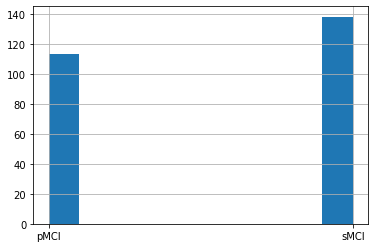

In [31]:
MCI_csv['Label'].hist()

In [92]:
from collections import Counter



# Count occurrences of each item
item_counts = Counter(MCI_csv['Label'])

# Print the count of each item
for item, count in item_counts.items():
    print(f"{item}: {count}")


m06: 5
m12: 15
m36: 22
doesnt convert: 138
m24: 19
m48: 13
m18: 17
bl: 2
m120: 5
m84: 2
m60: 1
m72: 4
m108: 5
m138: 1
m96: 2


In [93]:
MCI_csv['Binary Label'] = MCI_csv['Label'].apply(lambda x: -1 if x =='doesnt convert' else 1)

<AxesSubplot:>

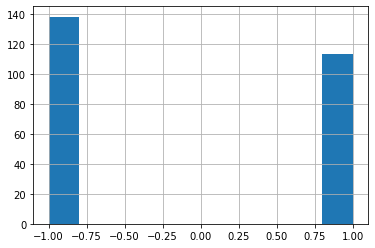

In [94]:
MCI_csv['Binary Label'].hist()

In [37]:
MCI_csv.to_csv('/Users/sasha/Desktop/DS/Thesis/data.nosync/MCI/MCI_processed.csv')